# Kostky

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
%matplotlib notebook

### Pravděpodobnostní funkce
- $S$ - hod jednou kostkou
- $R$ - hod dvěma kostkami (= dva hody jednou kostkou)
- $R$ a $S$ jsou nezávislé

In [3]:
sk = np.arange(6) + 1
pk = [1 / 6] * 6
pS = stats.rv_discrete(name='S', values=(sk, pk))

rk = np.arange(11) + 2
pk = np.array([1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]) / 36
pR = stats.rv_discrete(name='R', values=(rk, pk))

mu_s = pS.mean()
sig_s2 = pS.var()
mu_r = pR.mean()
sig_r2 = pR.var()

print('mu_S =', mu_s)
print('sigma_S^2 =', sig_s2)
print('mu_R =', mu_r)
print('sigma_R^2 =', sig_r2)

mu_S = 3.5
sigma_S^2 = 2.91666666667
mu_R = 7.0
sigma_R^2 = 5.83333333333


In [4]:
fig, ax = plt.subplots(figsize=(6,3))
ax.plot(sk-.05, pS.pmf(sk), 'bo', ms=4, mec='b')
ax.vlines(sk-.05, 0, pS.pmf(sk), colors='b', label='S')

ax.plot(rk+.05, pR.pmf(rk), 'go', ms=4, mec='g')
ax.vlines(rk+.05, 0, pR.pmf(rk), colors='g', label='R')

ax.legend();

<IPython.core.display.Javascript object>

### Distribuční funkce

<IPython.core.display.Javascript object>


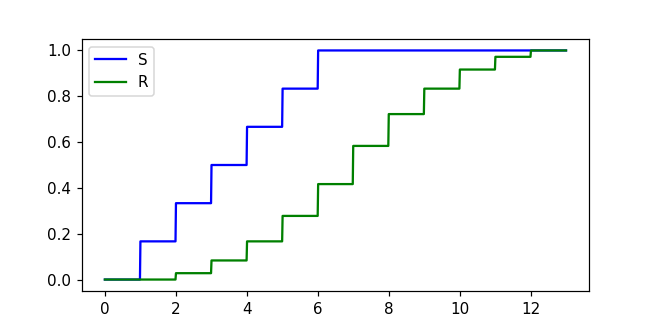

In [5]:
fig, ax = plt.subplots(figsize=(6,3))
x = np.linspace(0, 13, 1000)
ax.plot(x, pS.cdf(x), 'b-', label='S')
ax.plot(x, pR.cdf(x), 'g-', label='R')
ax.legend();

### Přesné řešení
$$ p_\mathrm{f} = \sum p_{Si} P_{Ri} $$

In [6]:
x = np.arange(2,7)
p_f = np.sum(pS.pmf(x) * pR.cdf(x))

### Simulace Monte Carlo - 1000 realizací

In [7]:
n = 1000
r = pR.rvs(size=n)
s = pS.rvs(size=n)

#rezerva spolehlivosti
z = r - s
p_f = np.sum(z<=0) / float(n)
print('p_f =', p_f)

p_f = 0.141


### Simulace MC - 1 000 000 realizací

In [8]:
n = 1000000
r = pR.rvs(size=n)
s = pS.rvs(size=n)

#rezerva spolehlivosti
z = r - s
p_f = np.sum(z<=0) / float(n)
print('p_f =', p_f)

p_f = 0.162541


### Spojité veličiny

In [9]:
rv_s = stats.uniform(0.5, 6)
rv_r = stats.triang(.5, loc=1.5, scale=11)
print('mu_S =', rv_s.mean(), '(spojité)', mu_s, '(diskrétní)')
print('sig_S^2 =', rv_s.var(), '(spojité)', sig_s2, '(diskrétní)')
print('mu_R =', rv_r.mean(), '(spojité)', mu_r, '(diskrétní)')
print('sig_R^2 =', rv_r.var(), '(spojité)', sig_r2, '(diskrétní)')

mu_S = 3.5 (spojité) 3.5 (diskrétní)
sig_S^2 = 3.0 (spojité) 2.91666666667 (diskrétní)
mu_R = 7.0 (spojité) 7.0 (diskrétní)
sig_R^2 = 5.04166666667 (spojité) 5.83333333333 (diskrétní)


In [10]:
s_c = rv_s.rvs(n)
r_c = rv_r.rvs(n)
z_c = r_c - s_c
p_fc = np.sum(z_c<=0) / float(n)
print('p_f =', p_fc)

p_f = 0.115039


### Grafické porovnání

<IPython.core.display.Javascript object>


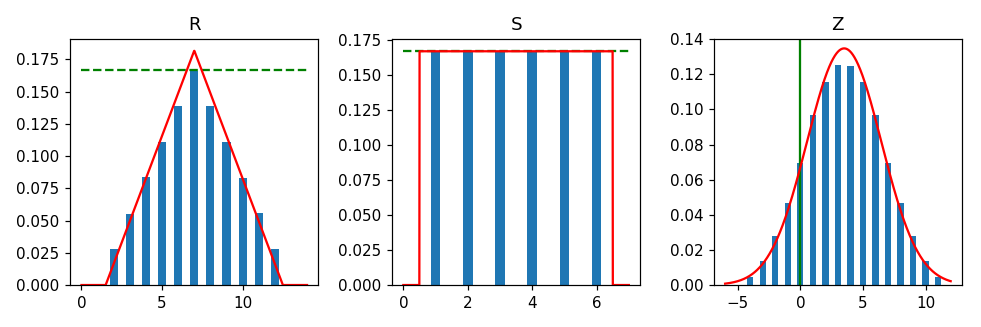

(0, 0.14)

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(9,3), tight_layout=True)

x_r = np.linspace(0, 14, 1000)
ax1.set_title('R')
ax1.hist(r, bins=11, range=(1.5,12.5), normed=True, rwidth=.5)
ax1.plot([0, 14], [1/6., 1/6.], 'g--')
ax1.plot(x_r, rv_r.pdf(x_r), 'r-')

x_s = np.linspace(0, 7, 1000)
ax2.set_title('S')
ax2.hist(s, bins=6, range=(0.5,6.5), normed=True, rwidth=.3)
ax2.plot([0, 7], [1/6., 1/6.], 'g--')
ax2.plot(x_s, rv_s.pdf(x_s), 'r-')

x_z = np.linspace(-6, 12, 1000)
rv_z = stats.norm(3.5, scale=np.std(z))
ax3.set_title('Z')
ax3.plot([0, 0], [0, 0.14], 'g-', linewidth=1.5)
ax3.hist(z, bins=16, range=(-4.5,11.5), normed=True, rwidth=.5)
ax3.plot(x_z, rv_z.pdf(x_z), 'r-')
ax3.set_ylim(0, 0.14)

### Cornellův index spolehlivosti
$$ \beta_\mathrm{C} = \frac{\mu_Z}{\sigma_Z} $$
$$ p_\mathrm{f} = \Phi\left( -\beta_\mathrm{C} \right) $$

- parametry původních diskrétních rozdělení

In [12]:
beta_c = (mu_r - mu_s)/ np.sqrt(sig_r2 + sig_s2)
p_f = stats.norm(0,1).cdf(-beta_c)
print('p_f =', p_f)

p_f = 0.118361785319


- parametry spojitých rozdělení

In [13]:
beta_c = (rv_r.mean() - rv_s.mean())/ np.sqrt(rv_r.var() + rv_s.var())
p_f = stats.norm(0,1).cdf(-beta_c)
print('p_f =', p_f)

p_f = 0.108559181546
